In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor as xgbr
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
X = pd.read_csv('exercise.csv')
X.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [3]:
y = pd.read_csv('calories.csv')
y.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [6]:
X['Gender']= X['Gender'].replace({'male':0,'female':1})

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 937.6 KB


In [8]:
y = y.drop('User_ID', axis = 1)

In [9]:
X.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


<Axes: xlabel='Gender', ylabel='count'>

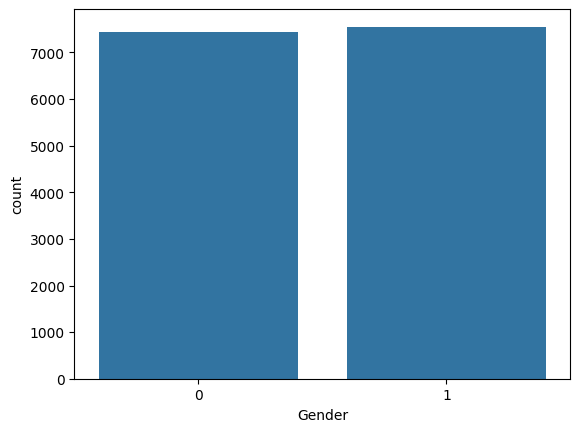

In [10]:
sns.countplot(x ='Gender',data = X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X.drop('User_ID', axis =1), y, test_size=0.2,stratify=X.Gender, random_state=2023)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Using Sklearn

In [13]:
model = xgbr().fit(X_train, y_train)

In [14]:
'Mean absolute error on train data: ' + str(metrics.mean_absolute_error(y_train, model.predict(X_train)))

'Mean absolute error on train data: 0.9286509672706016'

In [15]:
'Mean absolute error on test data: ' + str(metrics.mean_absolute_error(y_test, model.predict(X_test)))

'Mean absolute error on test data: 1.4395068902770678'

## Using Tensorflow

In [16]:
import tensorflow as tf
import keras
from keras import layers

In [17]:
# Create a model that include the normalization layer
model = tf.keras.Sequential([
    layers.Input(shape = 7),
    layers.Normalization(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
  ])

model.compile(loss='mae',
                optimizer="adam")
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
375/375 [==============================] - 2s 2ms/step - loss: 17.7833
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 1.7236
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 1.0824
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8084
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.7151
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6767
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6300
Epoch 8/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5738
Epoch 9/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5587
Epoch 10/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5492
Epoch 11/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5644
Epoch 12/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5468
Epoch 13/100

375/375 [==============================] - 1s 2ms/step - loss: 0.4392
Epoch 100/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4174


In [18]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3290


0.32898640632629395